# Variational Inference

2024-03-19


## Example 1: Gaussian-Gamma (Conjugate) posterior

### 1. Variational inference

对于某一元高斯分布，$\mathcal N(x | \mu, \tau^{-1})$ (这里用精度 $\tau = 1 / \sigma^2$ 来代替方差表示方法)，假设我们有 $N$ 个观测数据 $X = \{x_1, x_2, \dots, x_N\}$，那么似然函数为：

**likelihood：**
$$\begin{aligned}
    p(X | \mu, \tau) &= \prod_{i=1}^N (\frac{\tau}{2 \pi})^{1/2} \exp\bigg\{-\frac{\tau}{2} (x_i - \mu)^2 \bigg\} \\
     &= (\frac{\tau}{2 \pi})^{N / 2} \exp\bigg\{- \frac{\tau}{2} \sum_{i=1}^N (x_i - \mu)^2\bigg\}
\end{aligned}$$
它的共轭先验分布为 **Gaussian-Gamma分布**：

**prior：**
$$
    p(\mu | \tau) = \mathcal N(\mu_0, (\lambda_0 \tau)^{-1}) \propto \exp\big\{\frac{-\lambda_0 \tau}{2} (\mu - \mu_0)^2 \big\} \\
    p(\tau) = \text{Gamma}(\tau | a_0, b_0) \propto \tau^{a_0 -1} \exp\big\{-b_0 \tau \big\}
$$ 
可以看到这里 $\mu$ 和 $\tau$ 不独立。

**posterior：**
$$\begin{aligned}
    p(\mu, \tau | X) &= \frac{p(X | \mu, \tau) \, p(\mu | \tau) \, p(\tau)}{p(X)} \\
    & \propto p(X | \mu, \tau) \, p(\mu | \tau) \, p(\tau) \\
    &= \mathcal N(\mu_N, (\lambda_N \tau)^{-1})\ \text{Gamma} (\tau | a_N, b_N)
\end{aligned}$$
可以看到，一共有4个参数：$\mu_N, \lambda_N, a_N, b_N$

注意，这里是有后验的解析解的，还是从上面的式子中推导：
$$\begin{aligned}
    p(\mu, \tau | X) &\propto p(X | \mu, \tau) \, p(\mu | \tau) \, p(\tau) \\
    &\propto (\frac{\tau}{2 \pi})^{N/2} \exp\bigg\{-\frac{\tau}{2} \sum_{i=1}^N (x_i - \mu)^2 \bigg\} \, (\frac{\lambda_0 \tau}{2 \pi})^{1/2} \exp\big\{-\frac{\lambda_0 \tau}{2} (\mu - \mu_0)^2 \big\} \, \tau^{a_0 - 1} \exp\{ -b_0 \tau\} \\
    &\propto \tau^{(N+1)/2 + a_0 -1} \exp\{-b_0 \tau \} \, \exp\bigg\{-\frac{\tau}{2} \sum_{i=1}^N (x_i - \mu)^2 - \frac{\lambda_0 \tau}{2} (\mu - \mu_0)^2 \bigg\} \\
    &\propto \tau^{(N+1)/2 + a_0 -1} \exp\{-b_0 \tau \} \, \exp\bigg\{-\frac{\tau}{2} \sum_{i=1}^N x_i^2 \bigg\} \, \exp\bigg\{-\frac{\lambda_0 \mu_0^2 \tau}{2} \bigg\} \, \exp\bigg\{-\frac{(\lambda_0 + N) \tau}{2} \big(\mu - \frac{\sum_{i=1}^N x_i + \lambda_0 \mu_0}{\lambda_0 + N} \big)^2 \bigg\} \\
    &\propto \tau^{(N+1)/2 + a_0 -1} \exp\bigg\{- \big(b_0 + \frac{1}{2} \sum_{i=1}^N x_i^2 + \frac{\lambda_0 \mu_0^2}{2} \big) \tau \bigg\} \, \exp\bigg\{- \frac{(\lambda_0 + N) \tau}{2} \big(\mu - \frac{\sum_{i=1}^N x_i + \lambda_0 \mu_0}{\lambda_0 + N} \big)^2 \bigg\}
\end{aligned}$$
于是可以发现，前半部分 $\tau^{(N+1)/2 + a_0 -1} \exp\bigg\{- \big(b_0 + \frac{1}{2} \sum_{i=1}^N x_i^2 + \frac{\lambda_0 \mu_0^2}{2} \big) \tau \bigg\}$ 是 Gamma 分布的形式，后半部分 $\exp\bigg\{- \frac{(\lambda_0 + N) \tau}{2} \big(\mu - \frac{\sum_{i=1}^N x_i + \lambda_0 \mu_0}{\lambda_0 + N} \big)^2 \bigg\}$ 是 Gaussian 分布的形式，所以后验分布的解析式可以直接写得：
$$
    p(\mu, \tau | X) = \mathcal N \bigg(\mu | \frac{\sum_{i=1}^N x_i + \lambda_0 \mu_0}{\lambda_0 + N}, \big[(\lambda_0 + N) \tau \big]^{-1} \bigg) \cdot \text{Ga} \bigg(\tau | a_0 + \frac{N}{2}, b_0 + \frac{1}{2} \sum_{i=1}^N x_i^2 + \frac{\lambda_0 \mu_0^2}{2} \bigg)
$$
对应参数的精确解为：
$$\begin{aligned}
    \mu_N &= \frac{\lambda_0 \mu_0 + N \bar{x}}{\lambda_0 + N} \\
    \lambda_N &= \lambda_0 + N \\
    a_N &= a_0 + N / 2 \\
    b_N &= b_0 + \frac{1}{2} \sum_{i=1}^N (x_i - \bar{x})^2 + \frac{\lambda_0 N (\bar{x} - \mu_0)^2}{2 (\lambda_0 + N)}
\end{aligned}$$

那么假如不知道这个后验分布的解，比如一些非常复杂的后验分布无法求解，我们则需要通过变分推断(基于平均场)来近似这一后验。我们设该近似分布为：
$$
    q(\mu, \tau) = q_{\mu}(\mu) \, q_{\tau}(\tau)
$$
我们的目的是让 $q(\mu, \tau) \rightarrow p(\mu, \tau | X)$。

于是我们得到最优解 $q_{\mu}^{*}(\mu)$ 满足：
$$\begin{aligned}
    \log q_{\mu}^{*}(\mu) &= \mathbb E_{q_{\tau}(\tau)} [\log p(\mu, \tau, X)] \\
    &= \mathbb E_{q_{\tau}(\tau)} [\log p(X | \mu, \tau) + \log p(\mu | \tau)] + \text{const} \\
    &= \int_{\tau} q_{\tau}(\tau) \left[\frac{N}{2} \log (\tau) - \frac{\tau}{2} \sum_{i=1}^N (x_i - \mu)^2 - \frac{\lambda_0 \tau}{2} (\mu - \mu_0)^2 \right] + \text{const} \quad (将与 \mu 无关的项用 \text{const} 表示)\\
    &= -\frac{\mathbb E_{q_{\tau}(\tau)} [\tau]}{2} \left[\sum_{i=1}^N (x_i - \mu)^2 + \lambda_0 (\mu - \mu_0)^2 \right] + \text{const} \\
    &= - \frac{\mathbb E_{q_{\tau}(\tau)} [\tau] (N + \lambda_0)}{2} \left(\mu - \frac{N \bar{x} + \lambda_0 \mu_0}{N + \lambda_0} \right)^2 + \text{const}
\end{aligned}$$
所以，$q_{\mu}^*(\mu) = \mathcal N \big(\frac{N\bar{x} + \lambda_0 \mu_0}{N + \lambda_0}, \mathbb E_{q_{\tau}} [\tau] (N + \lambda_0) \big)$。
同理，$\log q_{\tau}^*(\tau) = \big(\underbrace{\frac{N}{2} + a_0}_{a_N} - 1 \big) \log(\tau) - \tau \big(\underbrace{b_0 + \frac{1}{2} \mathbb E_{q_{\mu}} [\sum_{i=1}^N (x_i - \mu)^2 + \lambda_0 (\mu - \mu_0)^2]}_{b_N} \big) + \text{const}$。
所以，$q_{\tau}^*(\tau) = \text{Gamma} (a_N, b_N)$

<br>

**可以得出结论**：

(1) 无须指定 $q_{\mu}(\mu)$ 和 $q_{\tau}(\tau)$ 的函数形式，因为它们可以从似然函数和共轭先验自动推导出来；

(2) 虽然我们假设了 $q_{\mu}(\mu)$ 和 $q_{\tau}(\tau)$ 相互独立，但求解结果表明它们是相互耦合的，即 $q_{\mu}(\mu)$ 依赖于 $q_{\tau}(\tau)$，而反过来 $q_{\tau}(\tau)$ 依赖于 $q_{\mu}(\mu)$。

(3) $\mu_N$ 和 $a_N$ 是固定常数，只有 $\lambda_N$ 和 $b_N$ 需要迭代更新。

### 2. Iterative optimization and Computing the expectation

根据上面的推断结果，进行一定顺序下的迭代优化求解：$\mathbb E [\tau] \longrightarrow q_{\mu}(\mu): \mathbb E[\mu], \mathbb E[\mu^2] \longrightarrow q_{\tau}(\tau): a_N, b_N \longrightarrow \mathbb E[\tau] \longrightarrow \dots$。
所以接下来的问题就是如何设置初始值 $\mathbb E[\tau]$，由于两个分布相互耦合，那么初始值一定会满足某些约束（为了简化计算，我们不妨令参数 $a_0 = b_0 = \mu_0 = \tau_0 = 0$
（即无信息先验）），为了实现更新，我们必须指定如何计算各种期望，接下来推导一下。
由于 $q_{\mu}(\mu) = \mathcal N(\mu | \mu_N, \lambda_N^{-1})$，我们得到：
$$\begin{aligned}
    \mathbb E_{q(\mu)}[\mu] &= \mu_N = \bar{x} \\
    \mathbb E_{q(\mu)}[\mu^2] &= \frac{1}{\lambda_N} + \mu_N^2 = \frac{1}{N \mathbb E_{q(\tau)}[\tau]} + \bar{x}^2 \quad (\frac{a_N}{b_N} = \mathbb E_{q(\tau)}[\tau])
\end{aligned}$$

由于 $q(\tau) = \text{Ga}(\tau | a_N, b_N)$，我们得到：
$$\begin{aligned}
    \mathbb E_{q(\tau)}[\tau] &= \frac{a_N}{b_N} \\
    \frac{1}{\mathbb E_{q(\tau)}[\tau]} &= \frac{b_N}{a_N} = \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2
\end{aligned}$$
所以：$\mathbb E_{q(\tau)}[\tau] = \frac{N}{\sum_{i=1}^N (x_i - \bar{x})^2}$。我们由此确定了 $\mathbb E_{q(\tau)}[\tau]$ 的初值。

现在我们可以给出**更新方程的显式形式**。

对于 $q(\mu)$ 我们有：
$$\begin{aligned}
    \mu_N &= \frac{\lambda_0 \mu_0 + N \bar{x}}{\lambda_0 + N} \\
    \lambda_N &= (\lambda_0 + N) \frac{a_N}{b_N}
\end{aligned}$$
对于 $q(\tau)$ 我们有：
$$\begin{aligned}
    a_N &= a_0 + \frac{N + 1}{2} \\
    b_N &= b_0 + \frac{1}{2} \lambda_0 \big(\mathbb E [\mu^2] + \mu_0^2 - 2 \mathbb E [\mu] \mu_0 \big) + \frac{1}{2} \sum_{i=1}^N \big(x_i^2 + \mathbb E [\mu^2] - 2 \mathbb E [\mu] x_i \big)
\end{aligned}$$
接下来就可以进行迭代优化。

可以看到 $\mu_N$ 和 $a_N$ 实际上是固定常数，只有 $\lambda_N$ 和 $b_N$ 需要迭代更新。事实上可以通过解析方式求解 $\lambda_N$ 和 $b_N$ 的不动点，但为了说明迭代更新方案，在这里不这样做。

### Codes (Numpy)

In [ ]:
# TODO

### Codes (JAX)

In [36]:
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')

from jax import random
from jax.scipy import stats
from dataclasses import dataclass
from jax.scipy.special import gammaln
from dataclasses import make_dataclass
import os
import seaborn as sns

In [66]:
def generate_data(key, N):
    """
    用于生成 N 个数据样本，这些样本来自于标准正态分布。然后对这些数据进行标准化
    :param key: 
    :param N: 
    :return: 
    """
    data = random.normal(key, (N,))
    data = (data - data.mean() / data.std())

    return data


# 定义 Gaussian-Gamma 类
@dataclass
class GaussianGamma:
    def __init__(self, mu, lambda_, a, b):
        self.mu = mu
        self.lambda_ = lambda_
        self.a = a
        self.b = b

    def gaussian_gamma_pdf(self, mu, tau, params):
        """
        计算 Gauss 和 Gamma 的 pdf
        这是真实的后验分布。
        :param mu: 
        :param lambda_: 
        :param params: 
        :return: 
        """
        N_part = stats.norm.pdf(mu, loc=params.mu, scale=1 / jnp.sqrt(params.lambda_ * tau))  # 计算 Gauss 部分的 pdf
        G_part = stats.gamma.pdf(tau, params.a, scale=1 / params.b)  # 计算 Gamma 部分的 pdf

        return N_part * G_part

    def vb_est_pdf(self, mu, tau, params):
        """
        Variational-bayes pdf of a univariate gaussian-gamma distribution
        单变量 Gaussian-Gamma 分布的 变分贝叶斯(近似) pdf
        :param mu: 
        :param tau: 
        :param params: 
        :return: 
        """
        N_part = stats.norm.pdf(mu, loc=params.mu, scale=1 / jnp.sqrt(params.lambda_))
        G_part = stats.gamma.pdf(tau, params.a, scale=1 / params.b)

        return N_part * G_part

    def vb_unigauss_learn(self, data, params_prior, eps=1e-6):
        """
        Variational Bayes (VB) procedure for estimating the parameters 
        of a univariate gaussian distribution.
        参数更新流程
        :param data: 
        :param params_prior: 
        :param params_init: 
        :param eps: 
        :return: 
        """
        lower_bound = -jnp.inf
        xbar = jnp.mean(data)  # 样本均值

        # 先验
        mu_0, lambda_0 = params_prior.mu, params_prior.lambda_
        a_0, b_0 = params_prior.a, params_prior.b

        # 初始值
        mu_N, lambda_N = self.mu, self.lambda_
        a_N, b_N = self.a, self.b

        converge = False
        params_hist = []  # 参数更新历史
        params_class = make_dataclass('params', [('mu', float), ('lambda_', float), ('a', float), ('b', float)])
        while not converge:
            est_params = params_class(mu_N, lambda_N, a_N, b_N)
            params_hist.append(est_params)  # before update

            # updata q_mu
            e_tau = a_N / b_N  # E[\tau]
            mu_N = (N * xbar + lambda_0 * mu_0) / (lambda_0 + N)
            lambda_N = (lambda_0 + N) * e_tau

            est_params = params_class(mu_N, lambda_N, a_N, b_N)
            params_hist.append(est_params)  # after update q_mu

            # update q_tau
            # 首先要计算期望
            # e_mu = xbar
            e_mu = mu_N
            e_mu2 = 1 / lambda_N + mu_N ** 2
            a_N = a_0 + (N + 1) / 2
            b_N = b_0 + lambda_0 * (e_mu2 + mu_0 ** 2 - 2 * mu_0 * e_mu) / 2 + (
                    data ** 2 + e_mu2 - 2 * e_mu * data).sum() / 2

            est_params = params_class(mu_N, lambda_N, a_N, b_N)
            params_hist.append(est_params)  # # after update q_tau

            lower_bound_new = -jnp.log(lambda_N) - gammaln(a_N) * jnp.log(b_N)  # TODO

            if abs(lower_bound_new / lower_bound - 1) < eps:
                converge = True
                est_params = params_class(mu_N, lambda_N, a_N, b_N)
                params_hist.append(est_params)
            else:
                lower_bound = lower_bound_new
        
        self.mu = mu_N
        self.lambda_ = lambda_N
        self.a = a_N
        self.b = b_N

        return est_params, params_hist  # 返回最后的迭代结果和参数优化记录

    def plot_gauss_exact_vb(self,
                            ax,
                            exact_params,  # true params
                            vb_params,  # vb estimate params
                            mu_min=-1, mu_max=1,
                            tau_min=0, tau_max=2,
                            npoints=500, levels=5,
                            bb=(0.1, 0.1)):

        mu_range = jnp.linspace(mu_min, mu_max, npoints)  # 构建 mu 和 tau 网格
        tau_range = jnp.linspace(tau_min, tau_max, npoints)
        proba_exact_space = gaussian_gamma_pdf_vmap(mu_range, tau_range, exact_params)
        proba_vb_space = vb_est_pdf_vmap(mu_range, tau_range, vb_params)
    
        contour_exact = ax.contour(mu_range, tau_range, proba_exact_space, colors="tab:blue", levels=levels, linewidths=2)
        contour_vb = ax.contour(mu_range, tau_range, proba_vb_space, colors="tab:orange", levels=levels)
        ax.set_xlabel(r"$\mu$", fontsize=15)
        ax.set_ylabel(r"$\tau$", fontsize=15)
        contour_exact.collections[0].set_label("exact")
        contour_vb.collections[0].set_label("VB")
    
        h1, _ = contour_exact.legend_elements()
        h2, _ = contour_vb.legend_elements()
        # ax.legend([h1[0], h2[0]], ["True", "VB estimate"], bbox_to_anchor=bb, frameon=False, fontsize=11)
        ax.legend([h1[0], h2[0]], ["True", "VB estimate"], frameon=False, fontsize=11)
        
        sns.despine()
        ax.tick_params(axis="both", which="major", labelsize=14)
    
        #     ax.axis("equal")
        ax.set_aspect("equal")


In [67]:
gaussian_gamma = GaussianGamma(None, None, None, None)

gaussian_gamma_pdf_vmap = jax.vmap(gaussian_gamma.gaussian_gamma_pdf, in_axes=(0, None, None))
gaussian_gamma_pdf_vmap = jax.vmap(gaussian_gamma_pdf_vmap, in_axes=(None, 0, None))

vb_est_pdf_vmap = jax.vmap(gaussian_gamma.vb_est_pdf, in_axes=(0, None, None))
vb_est_pdf_vmap = jax.vmap(vb_est_pdf_vmap, in_axes=(None, 0, None))

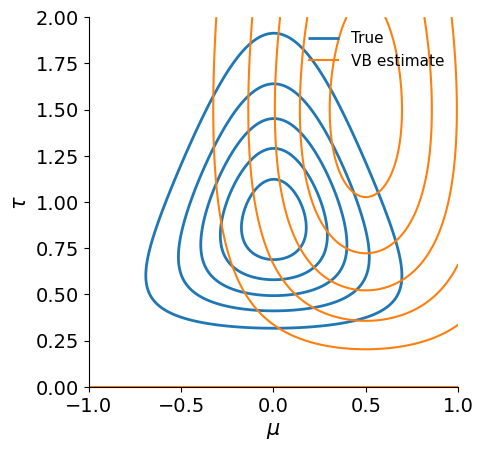

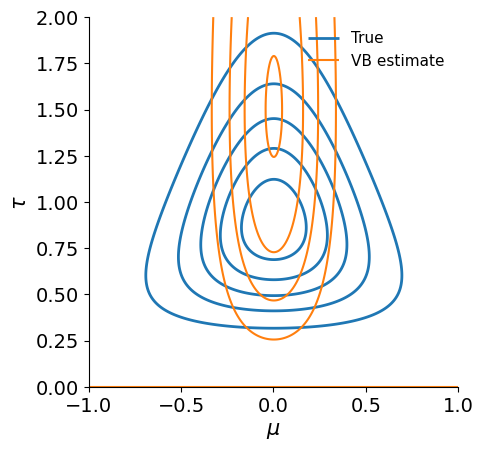

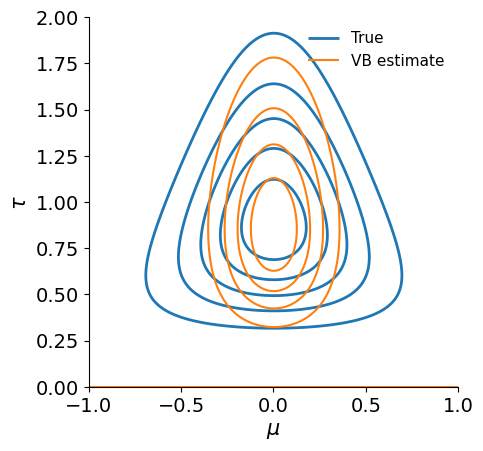

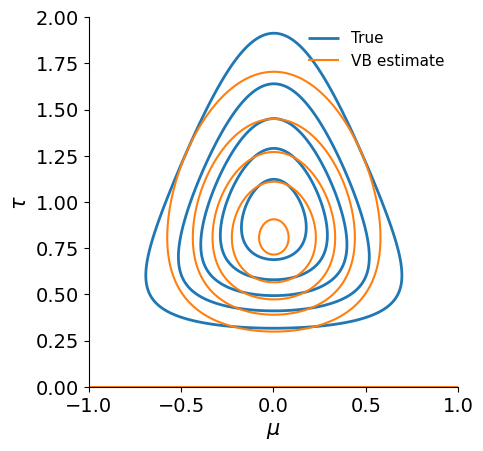

In [68]:
# 生成数据
key = random.PRNGKey(2024)
N = 10
data = generate_data(key, N)

# prior parameters of the distribution
# 参数先验
mu_0, lambda_0, a_0, b_0 = jnp.zeros(4)
params_prior = GaussianGamma(mu_0, lambda_0, a_0, b_0)

# exact parameters of the posterior distribution (according to the specified priors with values zero)
# 参数后验 (根据上面指定的先验)
x_bar = jnp.mean(data)
mu_post = jnp.mean(data)
lambda_post = N
a_post = N / 2
b_post = jnp.sum((data - mu_post) ** 2) / 2
posterior_params = GaussianGamma(mu_post, lambda_post, a_post, b_post)  # true params posterior

# variational-bayes (VB) estimation of the posterior parameters
# VB 后验估计
# e_tau_init = N / ((data - x_bar) ** 2).sum()
params_vb = GaussianGamma(mu=0.5, lambda_=5, a=2.5, b=1)  # vb estimate params initialize
_, params_hist = params_vb.vb_unigauss_learn(data, params_prior)  # 得到参数更新记录

"""
迭代流程
    1. initial estimate
    2. q_mu update
    3. q_tau update
    4. after convergence
"""
# 下面的可视化取前1，2，3次和最后一次的迭代结果
params_idx = [0, 1, 2, -1]
for i, idx_param in enumerate(params_idx):
    fig, ax = plt.subplots()
    vb_params = params_hist[idx_param]
    params_vb.plot_gauss_exact_vb(ax, posterior_params, vb_params, bb=(0.45, 0.22))
    # pml.savefig(f"unigauss_vb_{i}.pdf")

plt.show()